In [29]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Reading the data and calculating age of car based on manufacturing year

df=pd.read_csv('car_age_price.csv')
df['Age of car']=2024-df['Year']
df.head()

,Year,Price,Age of car
0,2018,465000,6
1,2019,755000,5
2,2019,700000,5
3,2018,465000,6
4,2018,465000,6


In [31]:
#Information regarding the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        112 non-null    int64
 1   Price       112 non-null    int64
 2   Age of car  112 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB


In [32]:
#CHecking for null values

df.isna().sum()

Year          0
Price         0
Age of car    0
dtype: int64

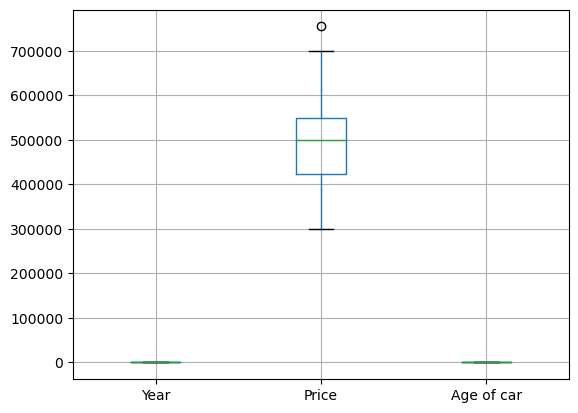

In [33]:
#Checking for outliers

df.boxplot()
plt.show()

In [34]:
#Handling outliers
#Outlier found in boxplot .Hence clip function is used to trim outlier value to boundary values
#For that Inter quartile range is found and equation is applied

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers_lower = df['Price']<(Q1-1.5*IQR)
outliers_upper = df['Price']>(Q3 + 1.5*IQR)

In [35]:
df['Price'].clip(Q1-1.5*IQR, Q3+1.5*IQR,inplace=True)

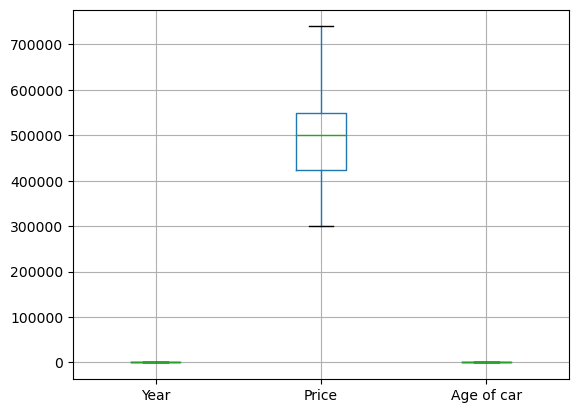

In [36]:
#Checking for outlier after clip function

df.boxplot()
plt.show()

In [37]:
#Dropping duplicates in data

df.drop_duplicates(inplace=True)

In [38]:
#Find the correlation between price and year of making using correlation matrix

corrmat=df[['Year','Price','Age of car']].corr()
corrmat


,Year,Price,Age of car
Year,1.000000,0.809377,-1.000000
Price,0.809377,1.000000,-0.809377
Age of car,-1.000000,-0.809377,1.000000


High correlation found between year of making and price of car.As age and year of making is having same correlation ,one can be discarded

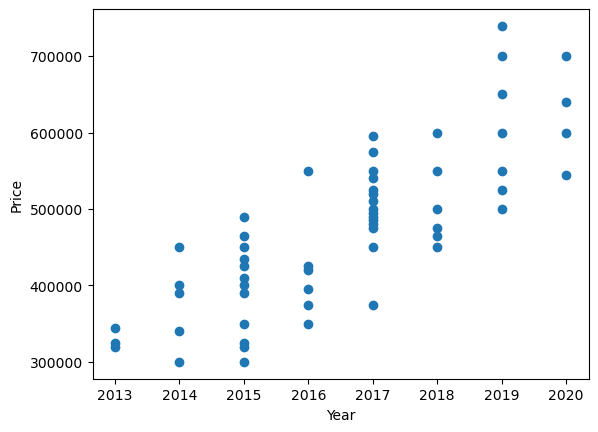

In [48]:
plt.scatter('Year','Price',data=df)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [41]:
# Defining Y and x for making models
Y=df['Price']
x=df.drop(['Price','Age of car'],axis=1)

In [43]:
#Splitting the avaialble data for training and testing,25% of data is kept for testing
#Linear model of data is made

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,random_state=42,test_size=0.25)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [44]:
# For testing of the obtained model with test data,first predictions is done for test input .

predictions=model.predict(x_test)
predictions

array([541515.12398191, 496000.72895928, 496000.72895928, 404971.93891403,
       359457.5438914 , 496000.72895928, 404971.93891403, 313943.14886878,
       404971.93891403, 496000.72895928, 632543.91402715, 404971.93891403,
       404971.93891403, 404971.93891403, 541515.12398191])

In [52]:
#Measuring accuracy of the model by calculating error values
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('Mean squared error = '+str(mean_squared_error(y_test,predictions)))
print('Mean absolute error = '+str(mean_absolute_error(y_test,predictions)))
print('r2 score = '+ str(r2_score(y_test,predictions)))

Mean squared error = 4365583906.648591
Mean absolute error = 56138.976078431806
r2 score = 0.5401422092546078


In [56]:
# Use the model to predict the prize of car for which year of making is 2022

year=2022
check=model.predict([[year]])
check


C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([723572.7040724])

In [47]:
# Relationship between price and year of making

print(f'Slope and intercept for thismodel is {model.coef_} and {model.intercept_} respectively' )


Slope and intercept for thismodel is [45514.39502262] and -91306534.0316742 respectively


 MODEL USING LASSO REGRESSION

In [57]:
from sklearn.linear_model import Lasso
lo=Lasso()
model_lo=lo.fit(x_train,y_train)

In [58]:
y_pred_lo=lo.predict(x_test)

In [59]:
y_pred_lo

array([541514.77375565, 496000.6576169 , 496000.6576169 , 404972.42533937,
       359458.3092006 , 496000.6576169 , 404972.42533937, 313944.19306184,
       404972.42533937, 496000.6576169 , 632543.00603318, 404972.42533937,
       404972.42533937, 404972.42533937, 541514.77375565])

In [62]:
print('MSE : ' + str(mean_squared_error(y_test,y_pred_lo)))
print('MAE : ' + str(mean_absolute_error(y_test,y_pred_lo)))
print('r2 score : ' + str(r2_score(y_test,y_pred_lo)))

MSE : 4365579275.701032
MAE : 56138.8692810456
r2 score : 0.5401426970650267


Based on error values,both linear regression model and lasso regression model is having same performance and r2 score of 0.54 indicates only 54% of variability of outcome data can be predicted using this model.